In [1]:
%load_ext autoreload
%autoreload 2

# diabsle deprecation warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import dotenv
import os
import time
from tqdm import tqdm
import pandas as pd
from legal_case_classifier import LegalCaseClassifier
from utils import load_json, save_json
dotenv.load_dotenv()

openai_key = os.getenv("OPENAI_API_KEY")
input_data_root = '../../../../ECHR/echr-processed/'

In [3]:
df_1 = pd.read_csv("../../../kc_classification_data/pre_cutoff_data/df_1.csv")
list_1 = df_1['file_path'].to_list()

df_2 = pd.read_csv("../../../kc_classification_data/pre_cutoff_data/df_2.csv")
list_2 = df_2['file_path'].to_list()

df_3 = pd.read_csv("../../../kc_classification_data/pre_cutoff_data/df_3.csv")
list_3 = df_3['file_path'].to_list()

df_4 = pd.read_csv("../../../kc_classification_data/pre_cutoff_data/df_4.csv")
list_4 = df_4['file_path'].to_list()

In [19]:
output_dir = './results_haiku/'
already_processed_files = os.listdir(output_dir)

# remove the prefix kc_ and not_kc_
already_processed_files = [f.replace('i_1_case_', '') for f in already_processed_files]
already_processed_files = [f.replace('i_2_case_', '') for f in already_processed_files]
already_processed_files = [f.replace('i_3_case_', '') for f in already_processed_files]
already_processed_files = [f.replace('i_4_case_', '') for f in already_processed_files]

In [20]:
for file_path in tqdm(list_1):
    # read the case file
    if file_path in already_processed_files:
        continue
    case_path = os.path.join(input_data_root, file_path)
    case_data = load_json(case_path)
    case_facts = case_data['facts']

    # classify the case
    classifier = LegalCaseClassifier(prompt_id='1', backend='anthropic')
    result = classifier.classify_case(case_facts=case_facts)

    # write the result to a file
    output_result = {}
    output_result['result'] = result
    output_result['importance'] = case_data['importance']
    output_result['date'] = case_data['judgementdate']

    save_json(f'./results_haiku/i_{case_data["importance"]}_case_{file_path}', output_result)
    time.sleep(5)

100%|██████████| 125/125 [00:00<00:00, 134674.54it/s]


In [18]:
for file_path in tqdm(list_2[37:]):
    # read the case file
    if file_path in already_processed_files:
        continue
    case_path = os.path.join(input_data_root, file_path)
    case_data = load_json(case_path)
    if 'facts' not in case_data:
        print(f'No facts in {file_path}')
        continue
    case_facts = case_data['facts']

    # classify the case
    classifier = LegalCaseClassifier(prompt_id='1', backend='anthropic')
    result = classifier.classify_case(case_facts=case_facts)

    # write the result to a file
    output_result = {}
    output_result['result'] = result
    output_result['importance'] = case_data['importance']
    output_result['date'] = case_data['judgementdate']

    save_json(f'./results_haiku/i_{case_data["importance"]}_case_{file_path}', output_result)
    time.sleep(10)

  0%|          | 0/88 [00:03<?, ?it/s]


RateLimitError: Error code: 429 - {'type': 'error', 'error': {'type': 'rate_limit_error', 'message': 'This request would exceed your organization’s rate limit of 50,000 input tokens per minute. For details, refer to: https://docs.anthropic.com/en/api/rate-limits; see the response headers for current usage. Please reduce the prompt length or the maximum tokens requested, or try again later. You may also contact sales at https://www.anthropic.com/contact-sales to discuss your options for a rate limit increase.'}}

In [ ]:
for file_path in tqdm(list_3):
    # read the case file
    case_path = os.path.join(input_data_root, file_path)
    case_data = load_json(case_path)
    if 'facts' not in case_data:
        print(f'No facts in {file_path}')
        continue
    case_facts = case_data['facts']

    # classify the case
    classifier = LegalCaseClassifier(prompt_id='1', backend='anthropic')
    result = classifier.classify_case(case_facts=case_facts)

    # write the result to a file
    output_result = {}
    output_result['result'] = result
    output_result['importance'] = case_data['importance']
    output_result['date'] = case_data['judgementdate']

    save_json(f'./results_haiku/i_{case_data["importance"]}_case_{file_path}', output_result)
    time.sleep(5)

  0%|          | 0/125 [00:00<?, ?it/s]


TypeError: LegalCaseClassifier.classify_case() takes 1 positional argument but 2 were given

In [ ]:
for file_path in tqdm(list_4):
    # read the case file
    case_path = os.path.join(input_data_root, file_path)
    case_data = load_json(case_path)
    if 'facts' not in case_data:
        print(f'No facts in {file_path}')
        continue
    case_facts = case_data['facts']

    # classify the case
    classifier = LegalCaseClassifier(prompt_id='1', backend='anthropic')
    result = classifier.classify_case(case_facts=case_facts)

    # write the result to a file
    output_result = {}
    output_result['result'] = result
    output_result['importance'] = case_data['importance']
    output_result['date'] = case_data['judgementdate']

    save_json(f'./results_haiku/i_{case_data["importance"]}_case_{file_path}', output_result)
    time.sleep(5)

  0%|          | 0/125 [00:00<?, ?it/s]

100%|██████████| 125/125 [18:14<00:00,  8.75s/it]


In [10]:
# key case = 1
# not key case = 0

# load all files in result and create a dataframe with the following columns 
# id, result.classification, ground_truth
# save the dataframe as csv

import pandas as pd
import os

def return_binary_classification(result):
    if result == 'KEY CASE':
        return 1
    else:
        return 0

def transalte_importance_score(importance):
    if importance == '1':
        return 1
    else:
        return 0

results_dir = './results_haiku/'
results = os.listdir(results_dir)

data = []
for result in results:
    result_data = load_json(os.path.join(results_dir, result))
    data.append({
        #'id': result_data['id'],
        'classification': return_binary_classification(result_data['result']['classification']),
        'ground_truth': transalte_importance_score(result_data['importance']),
    })

df = pd.DataFrame(data)

In [11]:
from utils import get_df_metrics

get_df_metrics(df, 'classification', 'ground_truth')

{'accuracy': 0.216,
 'precision': 1.0,
 'recall': 0.216,
 'f1': 0.35526315789473684}

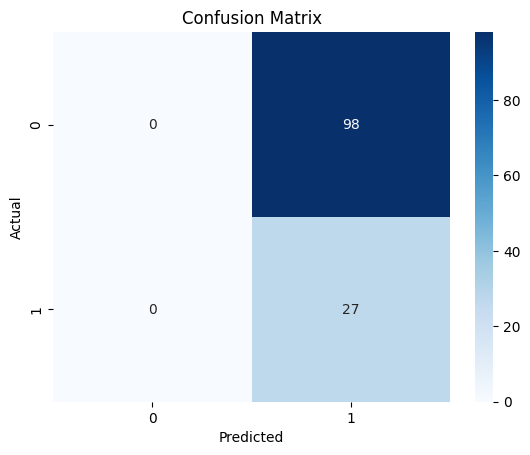

In [12]:
from utils import get_heatmap

get_heatmap(df, 'classification', 'ground_truth')

{'accuracy': 0.368, 'precision': 0.3103448275862069, 'recall': 0.216, 'f1': 0.2547169811320754}


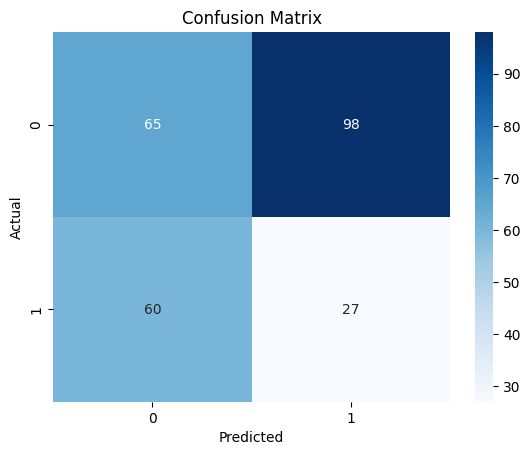

In [22]:
results_dir = './results_haiku/'
results = os.listdir(results_dir)

data = []
for result in results:
    if 'i_1' in result or 'i_2' in result:
        result_data = load_json(os.path.join(results_dir, result))
        data.append({
            #'id': result_data['id'],
            'classification': return_binary_classification(result_data['result']['classification']),
            'ground_truth': transalte_importance_score(result_data['importance']),
        })
df_1_2 = pd.DataFrame(data)
r = get_df_metrics(df_1_2, 'classification', 'ground_truth')
print(r)
get_heatmap(df_1_2, 'classification', 'ground_truth')

{'accuracy': 0.632, 'precision': 0.6170212765957447, 'recall': 0.696, 'f1': 0.6541353383458647}


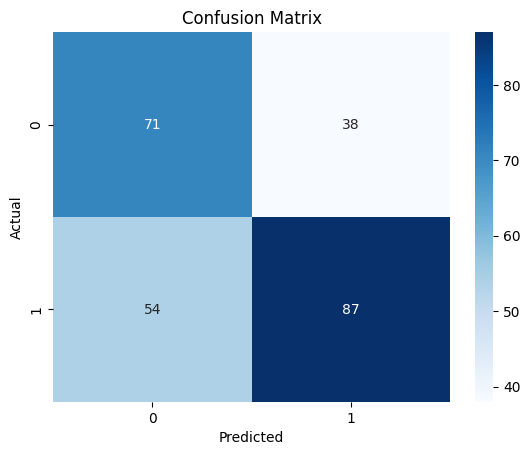

In [38]:
results_dir = './results/'
results = os.listdir(results_dir)

data = []
for result in results:
    if 'i_1' in result or 'i_3' in result:
        result_data = load_json(os.path.join(results_dir, result))
        data.append({
            #'id': result_data['id'],
            'classification': return_binary_classification(result_data['result']['classification']),
            'ground_truth': transalte_importance_score(result_data['importance']),
        })
df_1_3 = pd.DataFrame(data)
r = get_df_metrics(df_1_3, 'classification', 'ground_truth')
print(r)
get_heatmap(df_1_3, 'classification', 'ground_truth')

{'accuracy': 0.728, 'precision': 0.7435897435897436, 'recall': 0.696, 'f1': 0.7190082644628099}


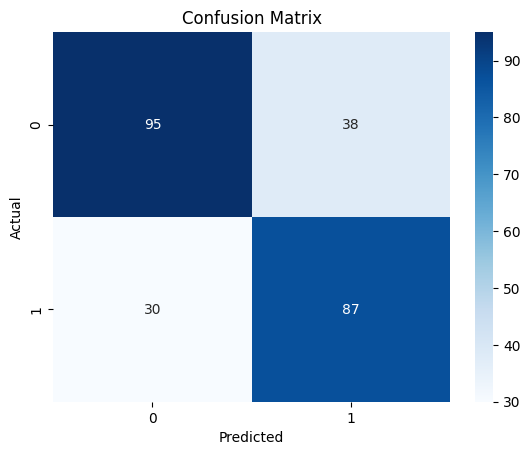

In [39]:
results_dir = './results/'
results = os.listdir(results_dir)

data = []
for result in results:
    if 'i_1' in result or 'i_4' in result:
        result_data = load_json(os.path.join(results_dir, result))
        data.append({
            #'id': result_data['id'],
            'classification': return_binary_classification(result_data['result']['classification']),
            'ground_truth': transalte_importance_score(result_data['importance']),
        })
df_1_4 = pd.DataFrame(data)
r = get_df_metrics(df_1_4, 'classification', 'ground_truth')
print(r)
get_heatmap(df_1_4, 'classification', 'ground_truth')

In [42]:
from statsmodels.stats.contingency_tables import mcnemar

data = []
for result in results:
    if 'i_2' in result:
        result_data = load_json(os.path.join(results_dir, result))
        data.append({
            #'id': result_data['id'],
            'classification': return_binary_classification(result_data['result']['classification']),
            'ground_truth': transalte_importance_score(result_data['importance']),
        })
df_2 = pd.DataFrame(data)

data = []
for result in results:
    if 'i_4' in result:
        result_data = load_json(os.path.join(results_dir, result))
        data.append({
            #'id': result_data['id'],
            'classification': return_binary_classification(result_data['result']['classification']),
            'ground_truth': transalte_importance_score(result_data['importance']),
        })
df_4 = pd.DataFrame(data)

l2 = df_2['classification'].to_list()
l4 = df_4['classification'].to_list()

# For cases that were Level 2 in one test and Level 4 in the other
# We only need to compare their predictions since the key cases predictions remained the same
level2_predictions = l2 #[0]*45 + [0]*80
level4_predictions = l4 #[0]*95 + [0]*30

# Create contingency table for McNemar's test
# This compares predictions between Level 2 and Level 4 for the same cases
table = [[0, 0], [0, 0]]
for l2, l4 in zip(level2_predictions, level4_predictions):
    table[l2][l4] += 1

# Perform McNemar's test
result = mcnemar(table, exact=True)

print("McNemar's test statistic:", result.statistic)
print("p-value:", result.pvalue)

McNemar's test statistic: 11.0
p-value: 2.633328534504438e-09
